<a href="https://colab.research.google.com/github/chrisluedtke/DS-Sprint-01-Dealing-With-Data/blob/master/WalkieTalkie-Chicago-CO2-plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np

url = "https://s3.amazonaws.com/aot-tarballs/chicago-complete.daily.2018-12-30.tar"
root = 'chicago-complete.daily.2018-12-30/'

nodes = pd.read_csv(root+'nodes.csv', h)
sensors = pd.read_csv(root+'sensors.csv')

!ls chicago-complete.daily.2018-12-30


In [0]:
data = pd.read_csv(root+'data.csv.gz', compression='gzip')

In [0]:
data.head(1)

,timestamp,node_id,subsystem,sensor,parameter,value_raw,value_hrf
0,2018/12/30 00:00:00,001e06113cf1,chemsense,at0,temperature,-19.0,-0.19
1,2018/12/30 00:00:00,001e06113cf1,chemsense,at1,temperature,16.0,0.16
2,2018/12/30 00:00:00,001e06113cf1,chemsense,at2,temperature,90.0,0.9
3,2018/12/30 00:00:00,001e06113cf1,chemsense,at3,temperature,139.0,1.39
4,2018/12/30 00:00:00,001e06113cf1,chemsense,chemsense,id,NaN,5410ec38b824
5,2018/12/30 00:00:00,001e06113cf1,chemsense,co,concentration,1120.0,-0.11275
6,2018/12/30 00:00:00,001e06113cf1,chemsense,h2s,concentration,863.0,0.01587
7,2018/12/30 00:00:00,001e06113cf1,chemsense,lps25h,pressure,100318.0,1003.18
8,2018/12/30 00:00:00,001e06113cf1,chemsense,lps25h,temperature,330.0,3.3
9,2018/12/30 00:00:00,001e06113cf1,chemsense,no2,concentration,877.0,0.02526


In [0]:
nodes.head()

,node_id,project_id,vsn,address,lat,lon,description,start_timestamp,end_timestamp
0,001e0610ba46,AoT_Chicago,004,State St & Jackson Blvd Chicago IL,41.878377,-87.627678,AoT Chicago (S) [C],2017/10/09 00:00:00,NaN
1,001e0610ba3b,AoT_Chicago,006,18th St & Lake Shore Dr Chicago IL,41.858136,-87.616055,AoT Chicago (S),2017/08/08 00:00:00,NaN
2,001e0610ba8f,AoT_Chicago,00D,Cornell & 47th St Chicago IL,41.810342,-87.590228,AoT Chicago (S),2017/08/08 00:00:00,NaN
3,001e0610ba16,AoT_Chicago,010,Ohio St & Grand Ave Chicago IL,41.891964,-87.611603,AoT Chicago (S) [C],2017/12/01 00:00:00,2018/06/04 00:00:00
4,001e0610ba8b,AoT_Chicago,018,Stony Island Ave & 63rd St Chicago IL,41.780600,-87.586456,AoT Chicago (S) [C],2018/02/26 00:00:00,NaN


In [0]:
data = data.merge(nodes, how='left')

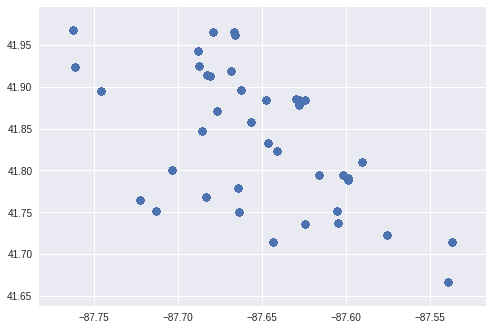

In [0]:
import matplotlib.pyplot as plt

plt.scatter(data['lon'], data['lat'])
plt.show()

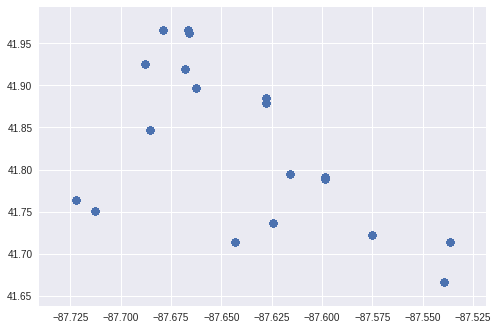

In [0]:

co2_data = data[['sensor', 'lon', 'lat', 'value_raw']]
parsed_data = co2_data.loc[co2_data['sensor'] == 'co'].dropna()

plt.scatter(parsed_data['lon'], parsed_data['lat'])

/usr/local/lib/python3.6/dist-packages/matplotlib/collections.py:853: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


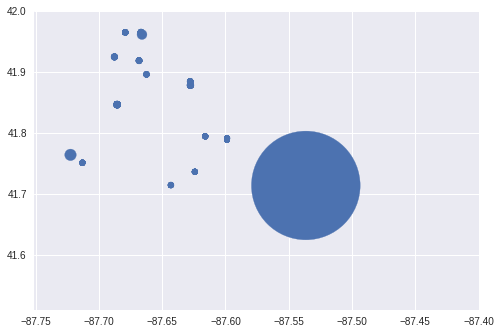

In [0]:
plt.scatter(parsed_data['lon'], parsed_data['lat'], s=pd.to_numeric(parsed_data['value_raw'])*0.01)